# **Desafio Gol**

## **Pré Processamento**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("case_analytics-ds.xlsx",
                   sheet_name = "Dados"
                   )

In [ ]:
# Nessa Etapa, aplico o pré processamento dos dados e entendo a sua natureza
df.head()

,Data Venda,Canal de Venda,Local de Venda,PAX,Monetário Vendido,RPK
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data Venda         2432 non-null   datetime64[ns]
 1   Canal de Venda     2432 non-null   object        
 2   Local de Venda     2432 non-null   object        
 3   PAX                2432 non-null   int64         
 4   Monetário Vendido  2432 non-null   float64       
 5   RPK                2432 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 114.1+ KB


In [ ]:
df.describe()

,PAX,Monetário Vendido,RPK
count,2432.000000,2432.000000,2432.000000
mean,723.002878,24638.740498,66738.389391
std,735.936451,22424.842904,83479.039478
min,18.000000,1041.544400,1127.000000
25%,100.000000,6122.920492,11372.000000
50%,395.500000,17755.421730,33361.500000
75%,1160.250000,35535.323991,95116.750000
max,4705.000000,144890.731053,695824.000000


In [ ]:
# Descobrindo quantos canais exitem e seu respectivos nomes
df['Canal de Venda'].unique()

array(['Telégrafo', 'TeleVenda', 'Porta a Porta'], dtype=object)

In [ ]:
# Descobrindo quantos locais exitem e seu respectivos nomes
df['Local de Venda'].unique()

array(['Mindscape', 'Arena', 'Vast', 'Ellipsis'], dtype=object)

In [ ]:
# Criando variaveis de tempo, para auxiliar as buscas e procuras
df['Mes']= df['Data Venda'].dt.month
df['Ano']= df['Data Venda'].dt.year
df['Semana']= df['Data Venda'].dt.dayofweek

In [ ]:
# Guardando a numeração de cada dia da semana
#days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df.head()

,Data Venda,Canal de Venda,Local de Venda,PAX,Monetário Vendido,RPK,Mes,Ano,Semana
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,11,2016,1
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,11,2016,1
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,11,2016,1
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,11,2016,1
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,11,2016,1


In [ ]:
# Analisando as variaveis mes e ano
df['Mes'].unique()

array([11, 12,  1,  2,  3,  4])

In [ ]:
df['Ano'].unique()

array([2016, 2017])

## **1**

In [ ]:
# Utilizei uma lista com os dias da semana e adicionei em um dicionario
# O dicionario que tem como chave os dias da semana e como valor o somatorio dos PAX
semana=['Segunda','Terça','Quarta','Quinta','Sexta','Sabado','Domingo']
i=0
pax= {}
while i<7:
  a=df[(df['Semana']==i)]['PAX'].sum()
  pax[semana[i]]= a
  i=i+1
pax

{'Domingo': 241620,
 'Quarta': 293025,
 'Quinta': 258488,
 'Sabado': 253467,
 'Segunda': 236316,
 'Sexta': 255625,
 'Terça': 219802}

In [ ]:
# Utilizei da função sort com o lambda igual ao valor do dicionario
# Foi invertido para o ranking em ordem decrescente
sortedDict = sorted(pax.items(), key=lambda x: x[1],reverse=True)
sortedDict

[('Quarta', 293025),
 ('Quinta', 258488),
 ('Sexta', 255625),
 ('Sabado', 253467),
 ('Domingo', 241620),
 ('Segunda', 236316),
 ('Terça', 219802)]

## **2** 

In [ ]:
# Utilizei o pandas para aplicar um slice 
# Assim apenas os dados requeridos são analisados
df1=df[(df['Semana']==6)|(df['Semana']==5)]

In [ ]:
# Usei a correlação de Pearson para a analise e comparei com o dataframe original
correlations = df1.corr(method='pearson')
correlations

,PAX,Monetário Vendido,RPK,Mes,Ano,Semana
PAX,1.000000,0.944510,0.821957,-0.040435,0.041457,-0.000705
Monetário Vendido,0.944510,1.000000,0.885230,-0.014040,0.012794,-0.008638
RPK,0.821957,0.885230,1.000000,-0.032729,0.033179,0.004653
Mes,-0.040435,-0.014040,-0.032729,1.000000,-0.986665,-0.045551
Ano,0.041457,0.012794,0.033179,-0.986665,1.000000,0.028768
Semana,-0.000705,-0.008638,0.004653,-0.045551,0.028768,1.000000


In [ ]:
correlations = df.corr(method='pearson')
correlations

,PAX,Monetário Vendido,RPK,Mes,Ano,Semana
PAX,1.000000,0.914135,0.840146,-0.054946,0.051640,0.012916
Monetário Vendido,0.914135,1.000000,0.875249,-0.031041,0.028281,0.147793
RPK,0.840146,0.875249,1.000000,-0.044487,0.041310,0.000134
Mes,-0.054946,-0.031041,-0.044487,1.000000,-0.987870,0.006342
Ano,0.051640,0.028281,0.041310,-0.987870,1.000000,0.000000
Semana,0.012916,0.147793,0.000134,0.006342,0.000000,1.000000


## **3**

### **Ideia Final**

In [ ]:
"""
No meu codigo inicial estava com dificuldades a priori
resolvi o problema sem ser de forma manual 
utilizando uma dupla de loop for
armazenei os resultados em dois dicionarios
que utilizei o mesmo metodo anterior para ordenar
"""

'\nNo meu codigo inicial estava com dificuldades a priori\nresolvi o problema sem ser de forma manual \nutilizando uma dupla de loop for\narmazenei os resultados em dois dicionarios\nque utilizei o mesmo metodo anterior para ordenar\n'

In [ ]:
mes =[1,2,3,4,11,12]
meses=['Janeiro','Fevereiro','Março','Abril','Novembro','Dezembro']
canal=df['Canal de Venda'].unique()
i=0
j=0
monetariomedia={}
monetariomediana={}
for i in range(len(mes)):
  for j in range(len(canal)):
    a= meses[i]+' '+canal[j]
    b=df[(df['Mes']==mes[i])&(df['Canal de Venda']==canal[j])]['Monetário Vendido'].mean()
    c=df[(df['Mes']==mes[i])&(df['Canal de Venda']==canal[j])]['Monetário Vendido'].median()
    monetariomedia[a]=b
    monetariomediana[a]=c
    j=j+1
  i=i+1

In [ ]:
meses[0]

'Janeiro'

In [ ]:
monetariomedia

{'Abril Porta a Porta': 33319.496262543136,
 'Abril TeleVenda': 35795.78191505989,
 'Abril Telégrafo': 3778.591834731236,
 'Dezembro Porta a Porta': 28615.45250014608,
 'Dezembro TeleVenda': 28045.72146147195,
 'Dezembro Telégrafo': 5212.648055123086,
 'Fevereiro Porta a Porta': 31710.148886151368,
 'Fevereiro TeleVenda': 32208.44581835027,
 'Fevereiro Telégrafo': 4307.6262728276815,
 'Janeiro Porta a Porta': 31320.569487223205,
 'Janeiro TeleVenda': 32868.88142893843,
 'Janeiro Telégrafo': 4234.02256669485,
 'Março Porta a Porta': 31055.939762396745,
 'Março TeleVenda': 32132.24671211832,
 'Março Telégrafo': 4568.148530922109,
 'Novembro Porta a Porta': 34638.07179648989,
 'Novembro TeleVenda': 30963.45934890067,
 'Novembro Telégrafo': 4614.3100756299955}

In [ ]:
monetariomediana

{'Abril Porta a Porta': 32421.609417997162,
 'Abril TeleVenda': 28091.885619205026,
 'Abril Telégrafo': 3458.8846660540144,
 'Dezembro Porta a Porta': 25527.519294582755,
 'Dezembro TeleVenda': 17567.600937751726,
 'Dezembro Telégrafo': 4227.5779481237205,
 'Fevereiro Porta a Porta': 29711.580145925567,
 'Fevereiro TeleVenda': 18926.69023166578,
 'Fevereiro Telégrafo': 4045.8931311515526,
 'Janeiro Porta a Porta': 28823.025304702787,
 'Janeiro TeleVenda': 19085.123237539552,
 'Janeiro Telégrafo': 3782.248867662558,
 'Março Porta a Porta': 30488.191027232337,
 'Março TeleVenda': 18666.87996923318,
 'Março Telégrafo': 4345.559552216315,
 'Novembro Porta a Porta': 30262.9779680581,
 'Novembro TeleVenda': 18757.707785280276,
 'Novembro Telégrafo': 4029.1321305130978}

In [ ]:
sortedDictmedia = sorted(monetariomedia.items(), key=lambda x: x[1],reverse=True)
sortedDictmedia


[('Abril TeleVenda', 35795.78191505989),
 ('Novembro Porta a Porta', 34638.07179648989),
 ('Abril Porta a Porta', 33319.496262543136),
 ('Janeiro TeleVenda', 32868.88142893843),
 ('Fevereiro TeleVenda', 32208.44581835027),
 ('Maio TeleVenda', 32132.24671211832),
 ('Fevereiro Porta a Porta', 31710.148886151368),
 ('Janeiro Porta a Porta', 31320.569487223205),
 ('Maio Porta a Porta', 31055.939762396745),
 ('Novembro TeleVenda', 30963.45934890067),
 ('Dezembro Porta a Porta', 28615.45250014608),
 ('Dezembro TeleVenda', 28045.72146147195),
 ('Dezembro Telégrafo', 5212.648055123086),
 ('Novembro Telégrafo', 4614.3100756299955),
 ('Maio Telégrafo', 4568.148530922109),
 ('Fevereiro Telégrafo', 4307.6262728276815),
 ('Janeiro Telégrafo', 4234.02256669485),
 ('Abril Telégrafo', 3778.591834731236)]

In [ ]:
sortedDictmediana = sorted(monetariomediana.items(), key=lambda x: x[1],reverse=True)
sortedDictmediana

[('Abril Porta a Porta', 32421.609417997162),
 ('Maio Porta a Porta', 30488.191027232337),
 ('Novembro Porta a Porta', 30262.9779680581),
 ('Fevereiro Porta a Porta', 29711.580145925567),
 ('Janeiro Porta a Porta', 28823.025304702787),
 ('Abril TeleVenda', 28091.885619205026),
 ('Dezembro Porta a Porta', 25527.519294582755),
 ('Janeiro TeleVenda', 19085.123237539552),
 ('Fevereiro TeleVenda', 18926.69023166578),
 ('Novembro TeleVenda', 18757.707785280276),
 ('Maio TeleVenda', 18666.87996923318),
 ('Dezembro TeleVenda', 17567.600937751726),
 ('Maio Telégrafo', 4345.559552216315),
 ('Dezembro Telégrafo', 4227.5779481237205),
 ('Fevereiro Telégrafo', 4045.8931311515526),
 ('Novembro Telégrafo', 4029.1321305130978),
 ('Janeiro Telégrafo', 3782.248867662558),
 ('Abril Telégrafo', 3458.8846660540144)]

## **4**

### **Mindscape**

In [ ]:
"""
Utilizei os graficos de dados posteriores para dar uma boa ideia visual
dos Passageiros em cada região. Separei para terem um treinamento indiviual, assim como sua devida analise.
"""

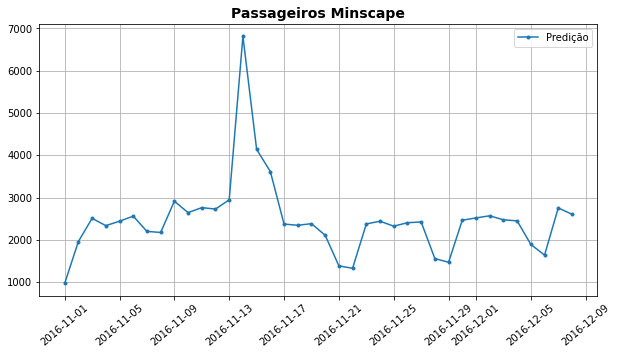

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Passageiros Minscape', fontsize=14, fontweight='bold')
plt.xticks(rotation=40 )
plt.plot(dfz['Data'], dfz['PAX'],'.-', label='Predição')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Criei um outro Dataframe com um slice da região requerida, resetei seu index
# e dropei algumas colunas que não serão usadas
dfa=df[(df['Local de Venda']=='Mindscape')].copy()
dfa.reset_index(inplace=True)
temporal=dfa['Data Venda']

dfa.drop(labels=[
                 'Canal de Venda','Local de Venda'
],axis=1,inplace=True)

In [ ]:
"""
Como cada região tem por volta de 4 instancias do mesmo dia
utilizei um looping for para filtrar os dias e no local uma somatoria dos outros valores.
"""
pax=[]
monetario=[]
rpk=[]
tempo=[]

tam=len(dfa['Data Venda'].unique())
datant=0
for i in range(tam):


  data=dfa['Data Venda'].loc[i]
  if datant==data:
    i=i+1
    continue
  elif datant == 0:
    datant= data


  tempo.append(data)   
  a= dfa[(dfa['Data Venda']==data)]['PAX'].sum()
  b= dfa[(dfa['Data Venda']==data)]['Monetário Vendido'].sum()
  c= dfa[(dfa['Data Venda']==data)]['RPK'].sum()
  pax.append(a)
  monetario.append(b)
  rpk.append(c)
  datant=data
  i=i+1


In [ ]:
dfz=pd.DataFrame({'Data':tempo,'PAX':pax,'Monetário Vendido':monetario,'RPK':rpk})

In [ ]:

dfz.drop(labels=['Monetário Vendido','RPK'],axis=1,inplace=True)

In [ ]:
dfz.set_index('Data', inplace=True)

In [ ]:
n, p = len(dfz), 0.7
train = dfz[:int(n*p)]
test = dfz[int(n*p):]

In [ ]:
# Utilizando o ARIMA para fazer o forecast do devido modelo
model = pm.auto_arima(train,
                      seasonal=True,
                      m=12,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# relatório
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=444.267, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=439.467, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=436.627, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=438.176, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=488.319, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=434.705, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=436.676, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=438.574, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=436.603, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=436.614, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=436.250, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=438.528, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=440.157, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 1.490 seconds
                     

In [ ]:
# Fazendo o forecast com parte do treino 
forecast = model.predict(len(test)+15)

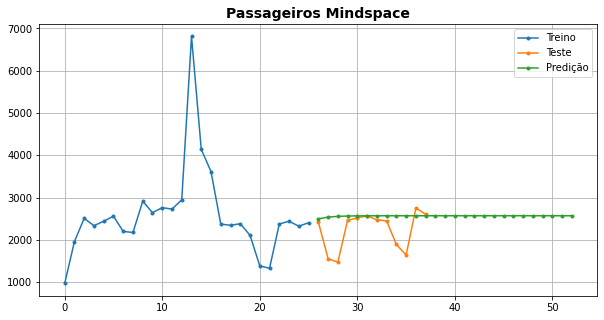

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Passageiros Mindspace', fontsize=14, fontweight='bold')
plt.plot(np.arange(int(n*p)), train.values,'.-', label='Treino')
plt.plot(np.arange(int(n*p), n), test.values,'.-', label='Teste')
plt.plot(np.arange(int(n*p), n+15), forecast,'.-', label='Predição')
plt.grid()
plt.legend()
plt.show()

### **Arena**

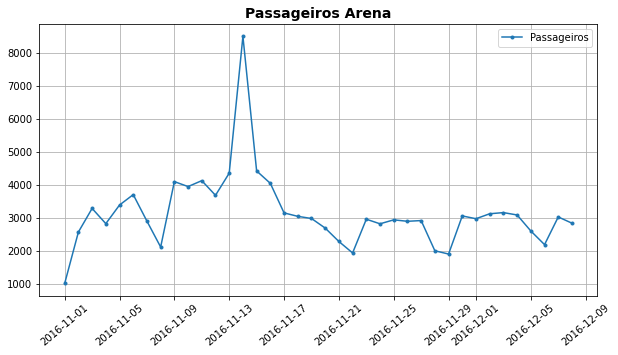

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Passageiros Arena', fontsize=14, fontweight='bold')
plt.xticks(rotation=40 )
plt.plot(dfz['Data'], dfz['PAX'],'.-', label='Passageiros')
plt.grid()
plt.legend()
plt.show()

In [ ]:
dfa=df[(df['Local de Venda']=='Arena')].copy()
dfa.reset_index(inplace=True)

In [ ]:
dfa.drop(labels=[
                 'Canal de Venda','Local de Venda'
],axis=1,inplace=True)

In [ ]:
pax=[]
monetario=[]
rpk=[]
tempo=[]

tam=len(dfa['Data Venda'].unique())
datant=0
for i in range(tam):


  data=dfa['Data Venda'].loc[i]
  if datant==data:
    i=i+1
    continue
  elif datant == 0:
    datant= data


  tempo.append(data)   
  a= dfa[(dfa['Data Venda']==data)]['PAX'].sum()
  b= dfa[(dfa['Data Venda']==data)]['Monetário Vendido'].sum()
  c= dfa[(dfa['Data Venda']==data)]['RPK'].sum()
  pax.append(a)
  monetario.append(b)
  rpk.append(c)
  datant=data
  i=i+1


In [ ]:
dfz=pd.DataFrame({'Data':tempo,'PAX':pax,'Monetário Vendido':monetario,'RPK':rpk})

In [ ]:
tempo=dfz['Data']
dfz.set_index('Data',inplace=True)

In [ ]:
dfz.drop(labels=['Monetário Vendido','RPK'],axis=1,inplace=True)

In [ ]:
# se necessário, descomentar e executar
#!pip install pmdarima

In [ ]:
import pmdarima as pm
n, p = len(dfz), 0.7
train = dfz[:int(n*p)]
test = dfz[int(n*p):]

In [ ]:
# treinando o modelo
model = pm.auto_arima(train,
                      seasonal=True,
                      m=12,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# relatório
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=456.422, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=450.384, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=448.868, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=449.967, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=501.206, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=447.254, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=448.925, Time=0.07 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=450.868, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=449.011, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=448.911, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=448.389, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=450.851, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=452.964, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 1.163 seconds
                     

In [ ]:
forecast = model.predict(len(test)+15)

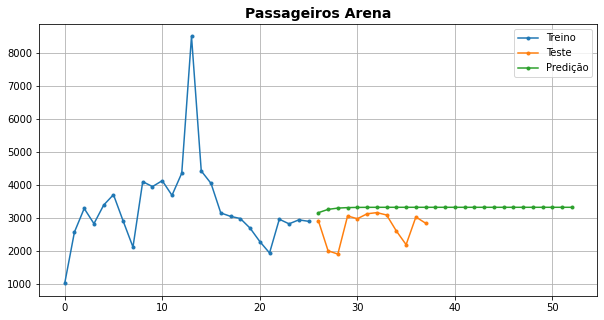

In [ ]:
# plot da predição
plt.figure(figsize=(10, 5))
plt.title('Passageiros Arena', fontsize=14, fontweight='bold')
plt.plot(np.arange(int(n*p)), train.values,'.-', label='Treino')
plt.plot(np.arange(int(n*p), n), test.values,'.-', label='Teste')
plt.plot(np.arange(int(n*p), n+15), forecast,'.-', label='Predição')
plt.grid()
plt.legend()
plt.show()

### **Vast**

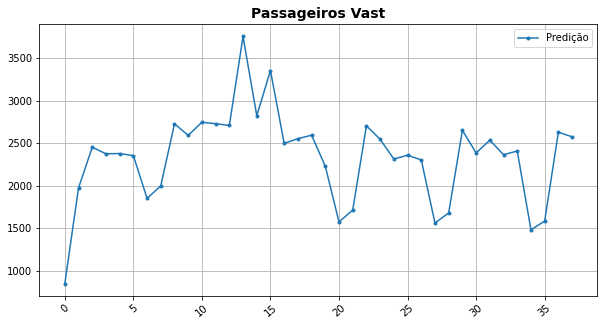

In [ ]:
a=len(dfz['PAX'])
plt.figure(figsize=(10, 5))
plt.title('Passageiros Vast', fontsize=14, fontweight='bold')
plt.xticks(rotation=40 )
plt.plot(range(a), dfz['PAX'],'.-', label='Predição')
plt.grid()
plt.legend()
plt.show()

In [ ]:
dfa=df[(df['Local de Venda']=='Vast')].copy()
dfa.reset_index(inplace=True)
temporal=dfa['Data Venda']

dfa.drop(labels=[
                 'Canal de Venda','Local de Venda'
],axis=1,inplace=True)

In [ ]:
pax=[]
monetario=[]
rpk=[]
tempo=[]

tam=len(dfa['Data Venda'].unique())
datant=0
for i in range(tam):


  data=dfa['Data Venda'].loc[i]
  if datant==data:
    i=i+1
    continue
  elif datant == 0:
    datant= data


  tempo.append(data)   
  a= dfa[(dfa['Data Venda']==data)]['PAX'].sum()
  b= dfa[(dfa['Data Venda']==data)]['Monetário Vendido'].sum()
  c= dfa[(dfa['Data Venda']==data)]['RPK'].sum()
  pax.append(a)
  monetario.append(b)
  rpk.append(c)
  datant=data
  i=i+1


In [ ]:
dfz=pd.DataFrame({'Data':tempo,'PAX':pax,'Monetário Vendido':monetario,'RPK':rpk})

In [ ]:
dfz.drop(labels=['Monetário Vendido','RPK'],axis=1,inplace=True)

In [ ]:
dfz.set_index('Data', inplace=True)

In [ ]:
n, p = len(dfz), 0.7
train = dfz[:int(n*p)]
test = dfz[int(n*p):]

In [ ]:
model = pm.auto_arima(train,
                      seasonal=True,
                      m=12,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# relatório
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=426.017, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=423.573, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=419.342, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=421.573, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=499.781, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=417.534, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=419.500, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=420.546, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=418.789, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=418.611, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=419.784, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=420.387, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=421.694, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 1.742 seconds
                     

In [ ]:
forecast = model.predict(len(test)+15)

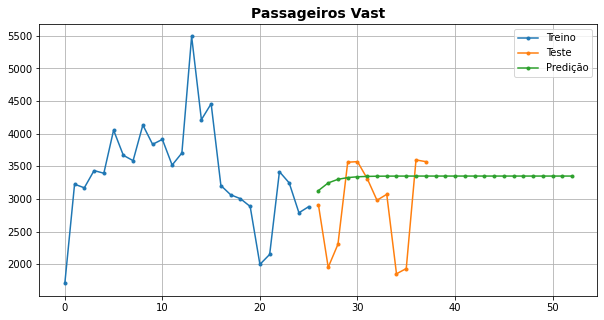

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Passageiros Vast', fontsize=14, fontweight='bold')
plt.plot(np.arange(int(n*p)), train.values,'.-', label='Treino')
plt.plot(np.arange(int(n*p), n), test.values,'.-', label='Teste')
plt.plot(np.arange(int(n*p), n+15), forecast,'.-', label='Predição')
plt.grid()
plt.legend()
plt.show()

### **Ellipsis**

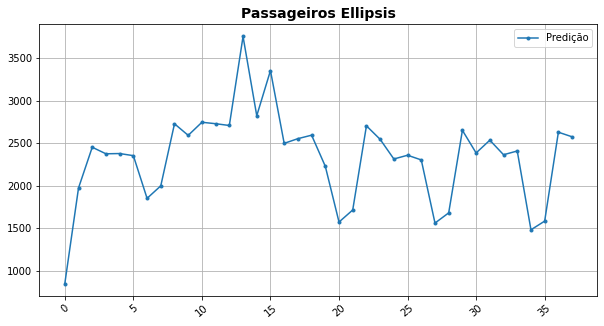

In [ ]:
a=len(dfz['PAX'])
plt.figure(figsize=(10, 5))
plt.title('Passageiros Ellipsis', fontsize=14, fontweight='bold')
plt.xticks(rotation=40 )
plt.plot(range(a), dfz['PAX'],'.-', label='Predição')
plt.grid()
plt.legend()
plt.show()

In [ ]:
dfa=df[(df['Local de Venda']=='Ellipsis')].copy()
dfa.reset_index(inplace=True)
temporal=dfa['Data Venda']

dfa.drop(labels=[
                 'Canal de Venda','Local de Venda'
],axis=1,inplace=True)

In [ ]:
pax=[]
monetario=[]
rpk=[]
tempo=[]

tam=len(dfa['Data Venda'].unique())
datant=0
for i in range(tam):


  data=dfa['Data Venda'].loc[i]
  if datant==data:
    i=i+1
    continue
  elif datant == 0:
    datant= data


  tempo.append(data)   
  a= dfa[(dfa['Data Venda']==data)]['PAX'].sum()
  b= dfa[(dfa['Data Venda']==data)]['Monetário Vendido'].sum()
  c= dfa[(dfa['Data Venda']==data)]['RPK'].sum()
  pax.append(a)
  monetario.append(b)
  rpk.append(c)
  datant=data
  i=i+1


In [ ]:
dfz=pd.DataFrame({'Data':tempo,'PAX':pax,'Monetário Vendido':monetario,'RPK':rpk})

In [ ]:
dfz.drop(labels=['Monetário Vendido','RPK'],axis=1,inplace=True)

In [ ]:
dfz.set_index('Data', inplace=True)

In [ ]:
n, p = len(dfz), 0.7
train = dfz[:int(n*p)]
test = dfz[int(n*p):]

In [ ]:
model = pm.auto_arima(train,
                      seasonal=True,
                      m=12,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# relatório
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=411.488, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=405.774, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=403.413, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=404.833, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=482.169, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=402.073, Time=0.06 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=403.785, Time=0.12 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=405.514, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=403.648, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=403.321, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=403.055, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=405.180, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=406.061, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 2.071 seconds
                     

In [ ]:
forecast = model.predict(len(test)+15)

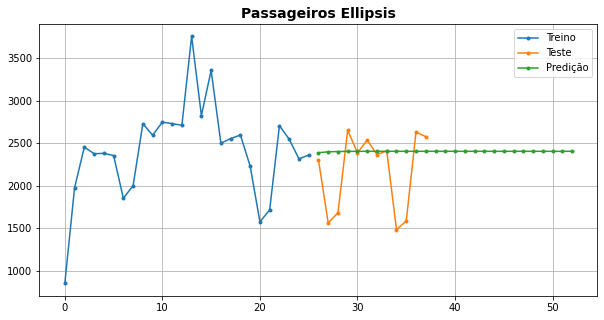

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Passageiros Ellipsis', fontsize=14, fontweight='bold')
plt.plot(np.arange(int(n*p)), train.values,'.-', label='Treino')
plt.plot(np.arange(int(n*p), n), test.values,'.-', label='Teste')
plt.plot(np.arange(int(n*p), n+15), forecast,'.-', label='Predição')
plt.grid()
plt.legend()
plt.show()

## **5**

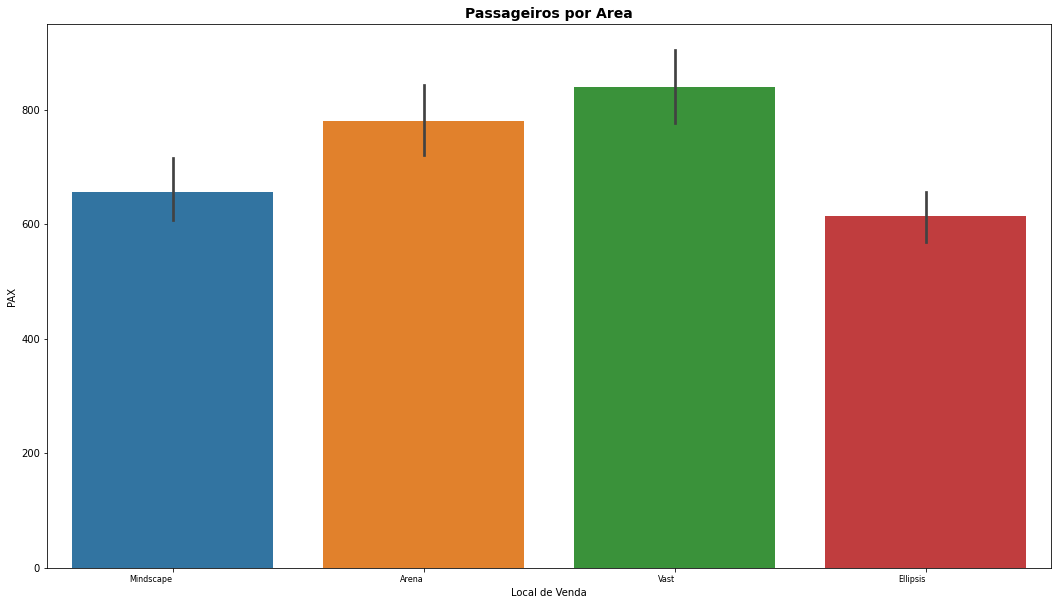

In [ ]:
# Utilizei um barplot para visualizar os passageiros por região
plt.figure(figsize=(18,10))
ax = sns.barplot(x='Local de Venda',y='PAX',data=df)
ax.set_xticklabels(ax.get_xticklabels(), ha="right", fontsize=8)
plt.title('Passageiros por Area', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# Utilizei de one hot encoding para analisar a importancia de cada local
x=pd.get_dummies(df['Local de Venda'])
y=df.iloc[:,2]

In [ ]:
feature_list

['Arena', 'Ellipsis', 'Mindscape', 'Vast']

In [ ]:
feature_list = list(x.columns)

In [ ]:
x=np.array(x)


In [ ]:
"""
Utilizei de dois modelos de machine learning para a analise
"""

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()      # (1)
clf.fit(x, y)                       # (2)
print(clf.feature_importances_)   

[0.30867039 0.27050258 0.19158005 0.22924698]


Feature Importances :  [0.28666067 0.26005134 0.19928026 0.25400776]


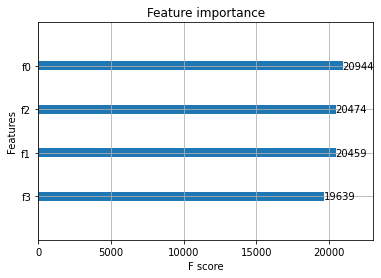

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(x, y)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model )
plt.show()

In [ ]:
random = clf.feature_importances_
xgb=xgb_model.feature_importances_

In [ ]:
i=0
RandomImportance= {}
while i<4:
  RandomImportance[feature_list[i]]= random[i]
  i=i+1

In [ ]:
i=0
XGBImportance= {}
while i<4:
  XGBImportance[feature_list[i]]= xgb[i]
  i=i+1

In [ ]:
# A importancia de cada feature ordenada

In [ ]:
RandomImportance

{'Arena': 0.3086703884197792,
 'Ellipsis': 0.2705025766386413,
 'Mindscape': 0.19158005226239438,
 'Vast': 0.22924698267918514}

In [ ]:
XGBImportance

{'Arena': 0.28666067,
 'Ellipsis': 0.26005134,
 'Mindscape': 0.19928026,
 'Vast': 0.25400776}

In [ ]:
sortedDict1 = sorted(RandomImportance.items(), key=lambda x: x[1],reverse=True)
sortedDict1

[('Arena', 0.3086703884197792),
 ('Ellipsis', 0.2705025766386413),
 ('Vast', 0.22924698267918514),
 ('Mindscape', 0.19158005226239438)]

In [ ]:
sortedDict2 = sorted(XGBImportance.items(), key=lambda x: x[1],reverse=True)
sortedDict2

[('Arena', 0.28666067),
 ('Ellipsis', 0.26005134),
 ('Vast', 0.25400776),
 ('Mindscape', 0.19928026)]

In [ ]:
a=df['Local de Venda'].unique()
for i in range(a):
  

In [ ]:
i=0
a=df['Local de Venda'].unique()
local= {}
for i in range(len(a)):
  local[a[i]]= df[(df['Local de Venda']==a[i])]['PAX'].sum()
  i=i+1

In [ ]:
local

{'Arena': 474388, 'Ellipsis': 373971, 'Mindscape': 399322, 'Vast': 510662}

## **6**

In [ ]:
#Cotação do Dolar(https://br.advfn.com/moeda/dolar/2017/01)
#Tratei os dados e repeti os valores caso não houvesse cotação. Usei o Excel para tal
dolar=pd.read_excel('dolar.xlsx')


In [ ]:
dolar.set_index('Data',inplace=True)

In [ ]:
df.set_index('Data Venda',inplace=True)

In [ ]:
df['Dolar']=dolar

In [ ]:
df.head()

,Canal de Venda,Local de Venda,PAX,Monetário Vendido,RPK,Dolar
Data Venda,,,,,,
2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,3.2399
2016-11-01,TeleVenda,Arena,52,3302.375951,8197,3.2399
2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,3.2399
2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,3.2399
2016-11-01,TeleVenda,Vast,46,2721.427289,2039,3.2399


In [ ]:
df.drop(labels=['Canal de Venda','Local de Venda','Monetário Vendido','RPK'],axis=1,inplace=True)

In [ ]:
x=np.array(df['Dolar'])
y=np.array(df['PAX'])

Text(0.5, 1.0, 'Dolar')

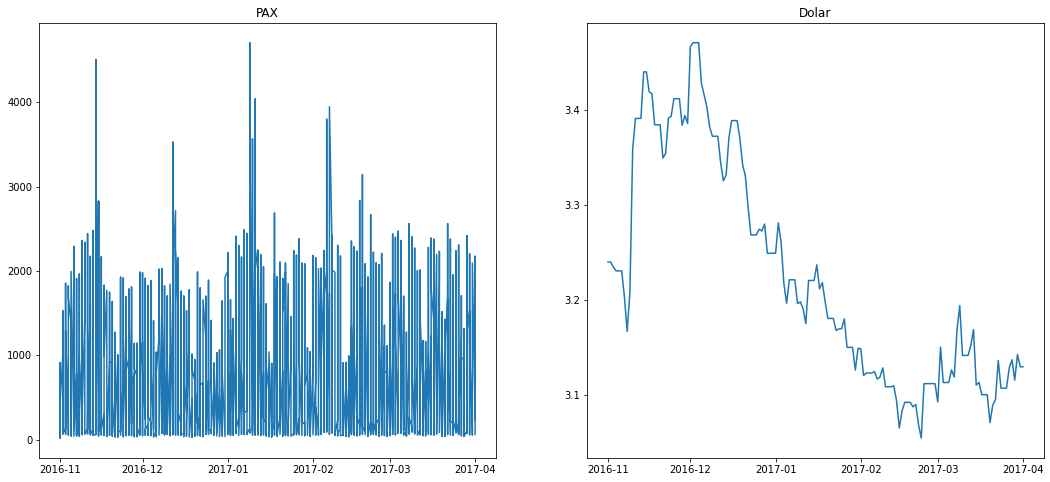

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].plot(tempo, df['PAX'])
axes[0].set_title("PAX")

axes[1].plot(tempo, df['Dolar'])
axes[1].axis('tight')
axes[1].set_title("Dolar")

In [ ]:
data=np.array(df['Dolar'])
labele=np.array(df['PAX'])

In [ ]:
data=data.reshape(-1,1)

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# Utilizei LSTM pois se tratava de uma serie temporal, Os dados mostraram pouca correlação na variavel final
i = Input(shape=(data.shape))
x = LSTM(128,activation='relu')(i)
x = Dense(10)(x)
x = LSTM(128)(i)
x = Dense(10)(x)
model = Model(i, x)

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
r = model.fit(data, labele, validation_split=0.1, epochs=30)

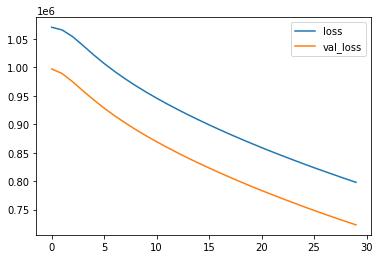

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(2432, 10)


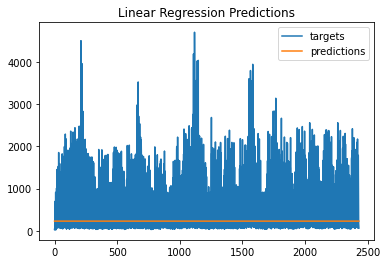

In [ ]:
outputs = model.predict(data)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(labele, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()